In [4]:
import numpy as np
from numpy.linalg import norm
from math import exp, sin, cos, acos, sqrt, degrees

import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Question 3

In [5]:
global J_B 

Quaternion to attitude matrix.  
No changes are needed.

In [6]:
def q_to_a(q):
    """
        quaternion to rotation matrix  
        @param q: quaternion  
        @param A: rotation matrix 
    """

    q_1 = q[0]
    q_2 = q[1]
    q_3 = q[2]
    q_4 = q[3]
    
    A = np.array([  [q_1**2 - q_2**2 - q_3**2 + q_4**2, 2*(q_1*q_2 + q_3*q_4), 2*(q_1*q_3 - q_2*q_4)],
                    [2*(q_2*q_1 - q_3*q_4), -q_1**2 + q_2**2 - q_3**2 + q_4**2, 2*(q_2*q_3 + q_1*q_4)],
                    [2*(q_3*q_1 + q_2*q_4), 2*(q_3*q_2 - q_1*q_4), -q_1**2 -q_2**2 + q_3**2 + q_4**2] ])

    return A

Below are the attitude kinematics and dynamics.  
### **You need to complete it.**

In [7]:
def Dynamics(omega, T):
    #----------------#
    # YOUR CODE HERE #
    #----------------#
    # J_1 = J_B[0,0]
    # J_2 = J_B[1,1]
    # J_3 = J_B[2,2]
    # T = L = torque
    wdot = np.linalg.inv(J_B) @ (T - np.cross(omega,J_B@omega))
    return  wdot

def q_dot(q, w):
    """
        derivative of a quaternion
    """

    q_1 = q[0]
    q_2 = q[1]
    q_3 = q[2]
    q_4 = q[3]
    
    # quaternion kinematics #
    #----------------#
    # YOUR CODE HERE #
    #----------------#
    # w represents angular velocity w_{B}^{BI}
    # quaternion represent a rotation matrix A_BI
    q_dot = 1/2*np.array([[q_4,-q_3,q_2 ],
                          [q_3 ,q_4,-q_1],
                          [-q_2,q_1 ,q_4],
                          [-q_1 ,-q_2 ,-q_3 ]])@w

    return q_dot

Below is the RK4 function that performs numerical integration.  
### **You need to complete it.**

In [8]:
def rk4(torque_input, w, q, dt):
    """
        4th fixed step runge-kutta attitude simulator
    """
    #----------------#
    # YOUR CODE HERE #
    #----------------#
    k_1_q = dt*q_dot(q, w)
    k_1_w = dt*Dynamics(w,torque_input)

    k_2_q = dt*q_dot(q + k_1_q/2, w+k_1_w/2)
    k_2_w = dt*Dynamics(w+k_1_w/2,torque_input)

    k_3_q = dt*q_dot(q + k_2_q/2, w+k_2_w/2)
    k_3_w = dt*Dynamics(w+k_2_w/2,torque_input)

    k_4_q = dt*q_dot(q + k_3_q, w+k_3_w)
    k_4_w = dt*Dynamics(w+k_3_w,torque_input)
    
    q = q + 1/6*(k_1_q+2*k_2_q+2*k_3_q+k_4_q)
    w = w + 1/6*(k_1_w+2*k_2_w+2*k_3_w+k_4_w)
    return q, w


Below are animation functions.  
### **You need to complete it.**

In [9]:
def plot_linear_cube(ax, x_I, color='red'):

    x = x_I[0,:]
    y = x_I[1,:]
    z = x_I[2,:]
    
    index = [   [0, 1, 2, 3],
                [4, 5, 6, 7],
                [0, 3, 7, 4], 
                [1, 2, 6, 5],
                [0, 1, 5, 4],
                [2, 3, 7, 6] ]
    kwargs = {'alpha': 1, 'color': color}

    for ii in range(len(index)):
        i = index[ii]
        ax.plot3D( [x[i[0]], x[i[1]], x[i[2]], x[i[3]], x[i[0]]], 
                    [y[i[0]], y[i[1]], y[i[2]], y[i[3]], y[i[0]]],
                    [z[i[0]], z[i[1]], z[i[2]], z[i[3]], z[i[0]]], **kwargs )


def animate(i, *fargs):
        ax = fargs[0]
        x_B = fargs[1]
        q_save = fargs[2]
        w_save = fargs[3]

        ax.clear() # clear everything including axes limits
        ax.set_xlim3d(-2,2)
        ax.set_ylim3d(-2,2)
        ax.set_zlim3d(-2,2)
        ax.set_xlabel('$X$')
        ax.set_ylabel('$Y$')
        ax.set_zlabel('$Z$')

        # rotate box using quaternion
        q = q_save[i]
        A_q = q_to_a(q)
        x_I_l = np.transpose(A_q) @ x_B
        plot_linear_cube(ax, x_I_l, 'blue')

        # plot angular velocity under the inertial frame
        #----------------#
        # YOUR CODE HERE #
        #----------------#
        w_B = w_save[i]
        w_I = np.transpose(A_q) @ w_B
        ax.quiver(0, 0, 0, w_I[0], w_I[1], w_I[2], length= 3 , normalize=True, color='r' )
        scale_w = 3/np.linalg.norm(w_I)
        ax.text(scale_w*w_I[0], scale_w*w_I[1], scale_w*w_I[2], 'w', color='red', fontsize=12)

        # plot e3 axis under the inertial frame
        #----------------#
        # YOUR CODE HERE #
        #----------------#
        z_B = np.array([0, 0, 1])
        z_I = np.transpose(A_q) @ z_B
        ax.quiver(0, 0, 0, z_I[0], z_I[1], z_I[2], length= 3 , normalize=True, color='g' )
        ax.text(3*z_I[0], 3*z_I[1], 3*z_I[2], 'e3', color='g', fontsize=12)

        # plot angular momentum under the inertial frame
        #----------------#
        # YOUR CODE HERE #
        #----------------#
        H_B = J_B @ w_B
        H_I = np.transpose(A_q)@H_B
        ax.quiver(0, 0, 0, H_I[0], H_I[1], H_I[2], length= 5 , normalize=True, color='b' )

        # calculate nutation angle and body cone angle 
        #----------------#
        # YOUR CODE HERE #
        #----------------#
        # print(H_B,np.linalg.norm(H_B))
        theta = np.rad2deg(acos(J_B[2,2]*w_B[2]/np.linalg.norm(H_B)))
        beta = np.rad2deg(acos(w_B[2]/np.linalg.norm(w_B)))
        ax.text(4*z_I[0], 4*z_I[1], 4*z_I[2], 'theta={:.2f}\nbeta={:.2f}'.format(theta,beta), color='k', fontsize=12)
        #print(theta)


Bdot controller producing magnetic momemnt thus applying magnetic torque on the satellite. 
### **You need to complete it.**


In [10]:
# CONTROLLERS

# Magnetic Controller
def bdot(q_new, q_old, dt, B_I):
    #----------------#
    # YOUR CODE HERE #
    #----------------#

    k = 1e10
    Aqnew = q_to_a(q_new)
    Aqold = q_to_a(q_old)
    B_new = Aqnew@ B_I
    B_old = Aqold@ B_I
    m = -k * (B_new-B_old)/dt
    L_mag = np.cross(m,B_new)
    return L_mag 


# Thruster controller
def thruster(r, F):
    return np.cross(r, F)

Below are the main function.
### **You need to complete it.**

In [41]:


def main(filename):

    # spacecraft dims, for thruster location
    lx = ly = 2.23606797749979 # meters
    lz = 5 # meters

    # thruster config
    # thruster 1, stabilizes positive spin in z axis by applying torque in negative z axis
    r1 = np.array([0, ly/2 ,0]) # Vector from COM to thruster 1 in BODY frame
    thrust_vec1 = np.array([1,0,0]) # Unit vector for thruster in BODY frame, thrust applied in this direction
    thrust1 = 3 #Newtons

    # thruster 2, stabilizes positive spin in x axis by applying torque in negative x axis
    r2 = np.array([0, 0, -lz / 2])
    thrust_vec2 = np.array([0, -1, 0])
    thrust2 = 3 # Newtons

    # thruster 3, stabilizes postiive spin in y axis by applying torque in negative y axis
    r3 = np.array([0, 0, lz / 2])
    thrust_vec3 = np.array([-1, 0, 0])
    thrust3 = 3 # Newtons

    # initial conditions
    q = np.array([0, 0, 0, 1])
    w = np.array([2,2,0])
    torque = np.array([0, 0, 0])

    t_max = 6; 

    # MODIFIED FOR THRUSTER
    if filename == 'bdot':
        t_max = 10
    if filename == 'thruster':
        t_max = 10
    t = 0
    dt = 1/30.0; # integration time step
    t_save = [] # save time 
    q_save = [] # save quaternion 
    w_save = [] # save angular velocity

    B_I = np.array([ 6.7e-5, 0, 0]) # Earth magnetic field in tesla under inertial frame 
    L_mag = 0 # initial magnetic torque 

    # for analytically solved angular velocity
    w_any_save = [] 
    w3_0 = w[2] 
    w1_0 = w[0]
    w2_0 = w[1]

    while t <= t_max:
        
        q, w = rk4(torque, w, q, dt)

        #----------------#
        # YOUR CODE HERE #
        #----------------#
        # calculate angular velocity analytically
        
        w_p = (1-J_B[2,2]/J_B[0,0])*w3_0 # J_t doesn't matter for Dzhanibeikov effect
        w1 = w1_0*cos(w_p*t) + w2_0*sin(w_p*t) #w3_0 = w_p
        w2 = w2_0*cos(w_p*t) - w1_0*sin(w_p*t)
        w3 = 5
        w_any_save.append(np.array([w1, w2, w3]))

        # update magnetic torque
        if t > 0 and filename == 'bdot':
            L_mag = bdot(q, q_save[-1], dt, B_I)
            torque = L_mag
        
        # MODIFIED FOR THRUSTER
        elif t > 0 and filename == 'thruster':
            thruster1 = thruster2 = thruster3 = np.array([0., 0., 0.])
            # if spin in x axis
            if (w[0] > 1e-10):
                thruster2 = thruster(r2, thrust2 * thrust_vec2)
            
            # if spin in y axis
            if (w[1] > 1e-10):
                thruster3 = thruster(r3, thrust3 * thrust_vec3)
            
            # if spin in z axis
            if (w[2] > 1e-10):
                thruster1 = thruster(r1, thrust1 * thrust_vec1)

            torque = thruster1 + thruster2 + thruster3

        
        t_save.append(t)
        q_save.append(q)
        w_save.append(w)
        t = t + dt


    
    q_save = np.asarray(q_save)
    w_save = np.asarray(w_save)
    w_any_save = np.asarray(w_any_save)

    # plot the results
    plt.figure(1)
    plt.subplot(2,1,1)
    plt.plot(t_save, q_save)
    plt.ylabel('Quaternion')
    plt.subplot(2,1,2)
    plt.plot(t_save, w_save)
    if filename == 'prolate':
        plt.plot(t_save, w_any_save, linestyle=':')
    plt.ylabel('Angular Velocity')
    plt.xlabel('Time')
    plt.show()


    # animation loop
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')   
    x_B = np.array([    [0, 1, 1, 0, 0, 1, 1, 0], 
                        [0 ,0, 1, 1, 0, 0, 1, 1], 
                        [0, 0, 0, 0, 2, 2, 2, 2] ]).astype('float64')
    x_B[0,:] = x_B[0,:] - 0.5
    x_B[1,:] = x_B[1,:] - 0.5
    x_B[2,:] = x_B[2,:] - 1

    ani = animation.FuncAnimation(fig, animate, frames=len(t_save), fargs=(ax, x_B, q_save, w_save))
    ani.save(f'./{filename}.gif', writer='pillow', fps=(1/dt))
        

### **Generate animation for Question 3(b) by running the code below** 

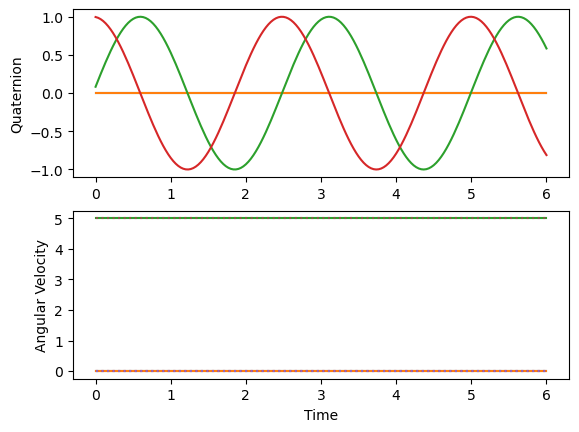

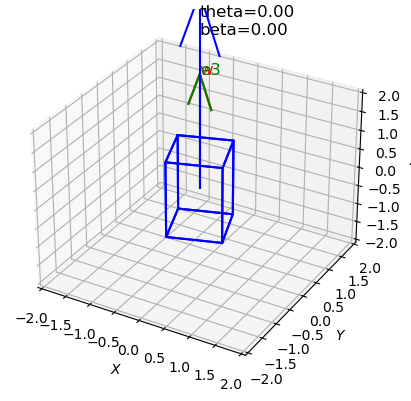

In [12]:
J_B = np.array([    [30, 0, 0],
                    [0, 30, 0],
                    [0, 0, 10]  ]) # prolate
main('prolate')

### **Generate plot and animation for thruster controller by running the code below** 

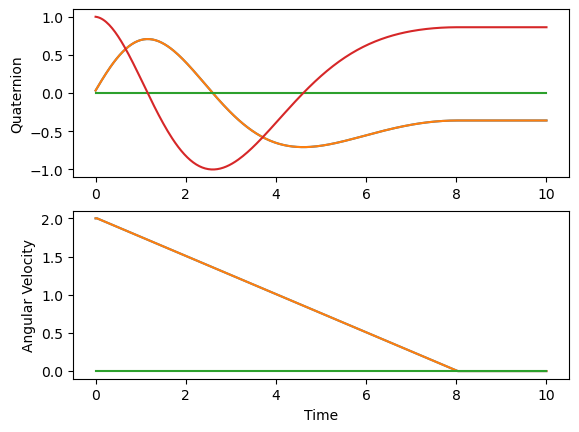

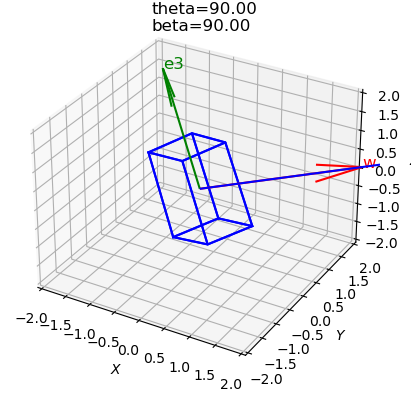

In [42]:
J_B = np.array([    [30, 0, 0],
                    [0, 30, 0],
                    [0, 0, 10]  ]) # prolate
main('thruster')

In [ ]:
J_B = np.array([    [30, 0, 0],
                    [0, 30, 0],
                    [0, 0, 10]  ]) # prolate
main('bdot')

In [ ]:
#----------------#
# YOUR CODE HERE #
#----------------#
J_B = np.array([    [30, 0, 0],
                    [0, 5, 0],
                    [0, 0, 20]  ]) # rotating about intermediate axis, only 
main('Dzhanibekov')